In [9]:
import numpy as np
import strawberryfields as sf
from strawberryfields.ops import *

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [10]:
def update(i):
    ax = fig.add_subplot(111, projection="3d")
    ax.set_axis_off()
    
    prog = sf.Program(1)   # one qumode circuit
    eng = sf.Engine('gaussian')    # initialize engine for circuit
    
    X = np.linspace(-20, 20, 400)
    P = np.linspace(-20, 20, 400)

    with prog.context as q:
        Vac | q[0]
        Dgate(i/100) | q[0]
        Rgate( (i/10) * np.pi/2) | q[0]
    
    state = gen_state(eng, prog)
    print("Run:", i)
    Z = state.wigner(0, X, P)
    X, P = np.meshgrid(X, P)
    surface = ax.plot_surface(X, P, Z, cmap='jet', lw=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True)

    return surface

def gen_state(eng=None, prog=None):
    state = eng.run(prog).state
    return state

Run: 0
Run: 0
Run: 1
Run: 2
Run: 3
Run: 4
Run: 5
Run: 6
Run: 7
Run: 8
Run: 9


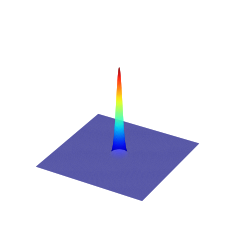

In [12]:
fig = plt.figure()

surface_anim = animation.FuncAnimation(fig, update, interval=100, repeat=True,  frames=10, blit=False)
#surface_anim = animation.ArtistAnimation(fig, ims, interval=30, blit=True)


# fig.set_size_inches(4.8, 5)
#ax.set_axis_off()

# save the animation
fn = "sample"
surface_anim.save(fn+".mp4", writer="ffmpeg", fps=10)

# show animation in notebook
#plt.rcParams['animation.html'] = 'html5'
#surface_anim

plt.show()